# Keras API Project on Loan prediction

# The Data
##### I will be using a subset of the LendingClub DataSet obtained from Kaggle: https://www.kaggle.com/wordsforthewise/lending-club

## My Goal
Given historical data on loans given out with information on whether or not the borrower defaulted (charge-off), can we build a model thatcan predict wether or nor a borrower will pay back their loan? This way in the future when we get a new potential customer we can assess whether or not they are likely to pay back the loan. Keep in mind classification metrics when evaluating the performance of your model!

The "loan_status" column contains our label.



In [1]:
import pandas as pd

In [2]:
data_info=pd.read_csv('../DATA/Lending_club_info.csv',index_col='LoanStatNew')

In [3]:
# data overview
data_info

,Description
LoanStatNew,
loan_amnt,The listed amount of the loan applied for by t...
term,The number of payments on the loan. Values are...
int_rate,Interest Rate on the loan
installment,The monthly payment owed by the borrower if th...
grade,LC assigned loan grade
sub_grade,LC assigned loan subgrade
emp_title,The job title supplied by the Borrower when ap...
emp_length,Employment length in years. Possible values ar...
home_ownership,The home ownership status provided by the borr...


In [4]:
print(data_info.loc['loan_amnt']['Description'])

The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.


In [5]:
def feat_info(col_name):
    print(data_info.loc[col_name]['Description'])

In [6]:
feat_info('mort_acc')

Number of mortgage accounts.


In [7]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

In [8]:
df=pd.read_csv('../DATA/lending_club_loan_two.csv')

In [9]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650"


### Countplot to see how many people have paid there loan.


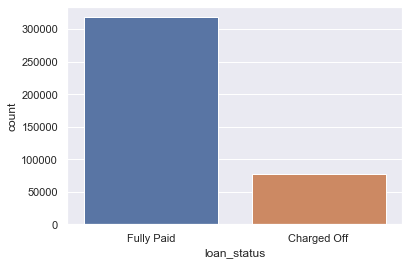

In [10]:
sns.countplot(x='loan_status',data=df)

### Histogram of loan ammounts.

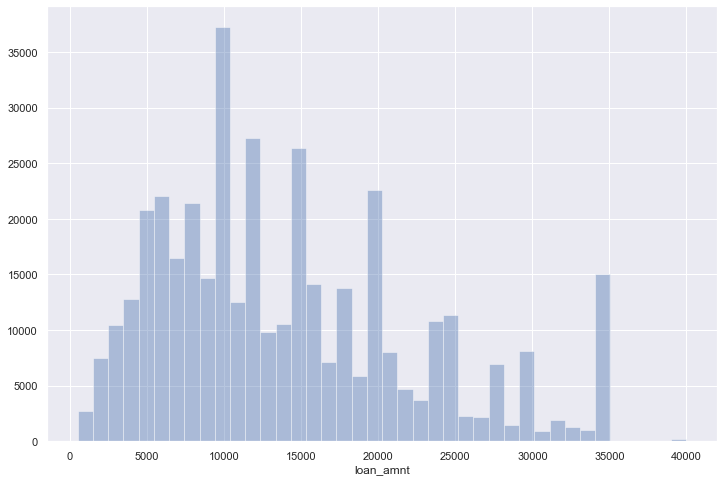

In [11]:
plt.figure(figsize=(12,8))
sns.distplot(df['loan_amnt'],kde=False,bins=40)

### To find the correaltion between the variables i am going to use heatmap.

(10, 0)

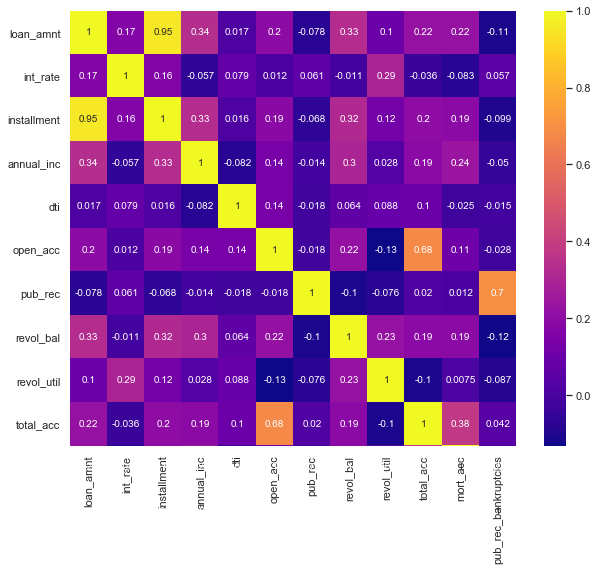

In [12]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True,cmap='plasma')
plt.ylim(10,0)

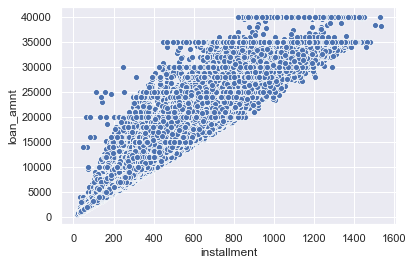

In [13]:
# Further visualising the correlation.
sns.scatterplot(y='loan_amnt',x='installment',data=df)

### So the installment and loan_amnt have a certain relationship

In [14]:
feat_info('installment')
print('')
feat_info('loan_amnt')
# Obviously t=installment and loan ammount will have a strong relationship
print('')
feat_info('loan_status')

The monthly payment owed by the borrower if the loan originates.

The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.

Current status of the loan


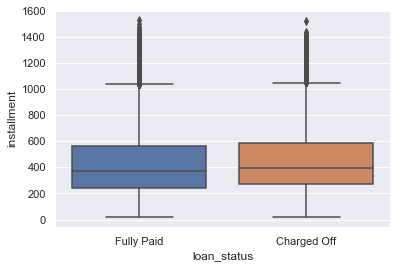

In [15]:
# A boxplot
sns.boxplot(x='loan_status',y='installment',data=df)

#### The summary statistics for the loan amount, grouped by the loan_status.

In [16]:
df.groupby('loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,15126.300967,8505.090557,1000.0,8525.0,14000.0,20000.0,40000.0
Fully Paid,318357.0,13866.878771,8302.319699,500.0,7500.0,12000.0,19225.0,40000.0


#### Exploring the Grade and SubGrade columns that LendingClub attributes to the loans. What are the unique possible grades and subgrades?

In [17]:
df['grade'].unique()

array(['B', 'A', 'C', 'E', 'D', 'F', 'G'], dtype=object)

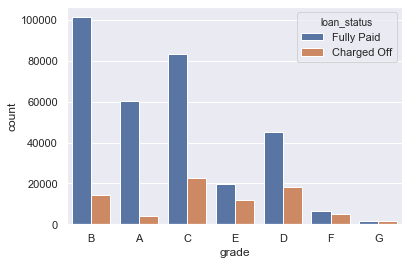

In [18]:
sns.countplot(x='grade',data=df,hue='loan_status')

As per the percentage mostly people in A,B and C have paid there loans , it looks like from E category to G there is a pattern

In [19]:
df['sub_grade'].unique()

array(['B4', 'B5', 'B3', 'A2', 'C5', 'C3', 'A1', 'B2', 'C1', 'A5', 'E4',
       'A4', 'A3', 'D1', 'C2', 'B1', 'D3', 'D5', 'D2', 'E1', 'E2', 'E5',
       'F4', 'E3', 'D4', 'G1', 'F5', 'G2', 'C4', 'F1', 'F3', 'G5', 'G4',
       'F2', 'G3'], dtype=object)

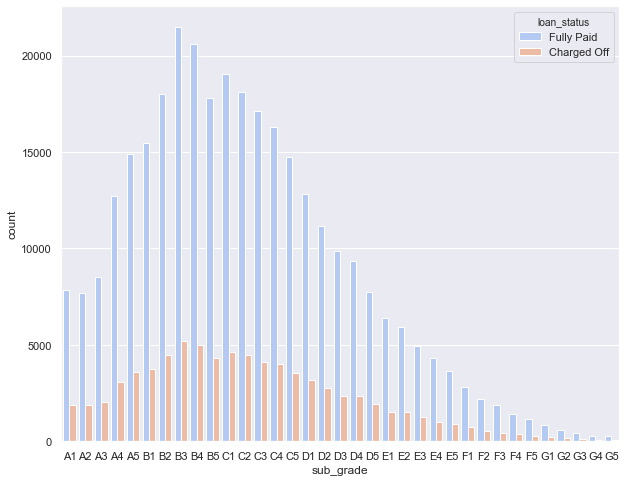

In [20]:
# It looks like columns are not sorted so
plt.figure(figsize=(10,8))
df['sub_grade']=sorted(df['sub_grade'])
sns.countplot(x='sub_grade',data=df,palette='coolwarm',hue='loan_status')

#### It looks like F and G subgrades don't get paid back that often. Isloating them and recreating the countplot just for those subgrades.

In [21]:
f_and_g=df[(df['grade']=='F') | (df['grade']=='G')]

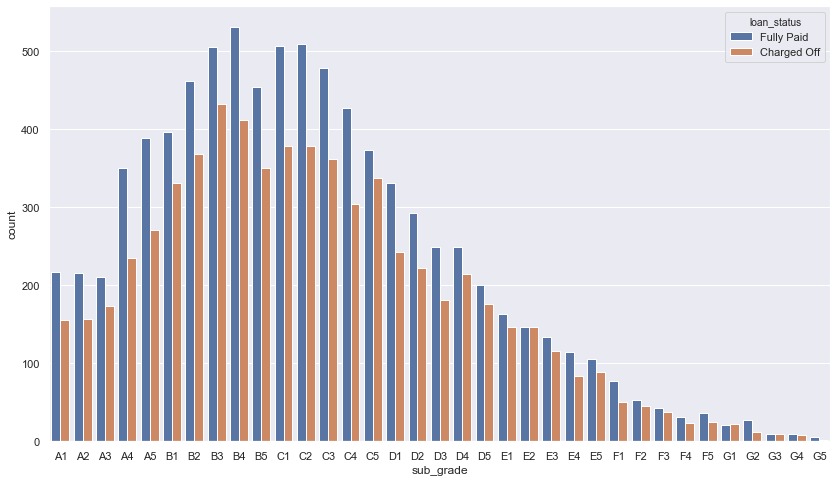

In [22]:
plt.figure(figsize=(14,8))
subgrade_order=sorted(df['sub_grade'].unique())
sns.countplot(x='sub_grade',data=f_and_g,hue='loan_status',order=subgrade_order)

#### Creating a new column called 'loan_repaid' which will contain a 1 if the loan status was "Fully Paid" and a 0 if it was "Charged Off".

In [23]:
df['loan_repaid']=df['loan_status'].map({'Fully Paid':1,'Charged Off':0})

In [24]:
df[['loan_repaid','loan_status']]

,loan_repaid,loan_status
0,1,Fully Paid
1,1,Fully Paid
2,1,Fully Paid
3,1,Fully Paid
4,0,Charged Off
...,...,...
396025,1,Fully Paid
396026,1,Fully Paid
396027,1,Fully Paid
396028,1,Fully Paid


# Data Preprocessing
Section Goals: Remove or fill any missing data. Remove unnecessary or repetitive features. Convert categorical string features to dummy variables.

In [25]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_repaid
0,10000.0,36 months,11.44,329.48,B,A1,Marketing,10+ years,RENT,117000.0,...,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690",1
1,8000.0,36 months,11.99,265.68,B,A1,Credit analyst,4 years,MORTGAGE,65000.0,...,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113",1
2,15600.0,36 months,10.49,506.97,B,A1,Statistician,< 1 year,RENT,43057.0,...,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113",1
3,7200.0,36 months,6.49,220.65,A,A1,Client Advocate,6 years,RENT,54000.0,...,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813",1
4,24375.0,60 months,17.27,609.33,C,A1,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650",0


In [26]:
len(df)

396030

In [27]:
# To find missing values
100*df.isnull().sum()/len(df)

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               5.789208
emp_length              4.621115
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.443148
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                9.543469
pub_rec_bankruptcies    0.135091
address                 0.000000
loan_repaid             0.000000
dtype: float64

##### Most of the columns are filled properly , looking over the values data < 0.5 can be dropped , there is no harm in it

In [28]:
# Checking credibility of the data
feat_info('emp_title')
df['emp_title'].nunique()
df['emp_title'].value_counts()

The job title supplied by the Borrower when applying for the loan.*


Teacher               4389
Manager               4250
Registered Nurse      1856
RN                    1846
Supervisor            1830
                      ... 
Cowan Realtors           1
NewBay Media             1
FURANCE OPERATOR         1
Pea Soup Andersens       1
Select Data              1
Name: emp_title, Length: 173105, dtype: int64

In [29]:
# Realistically there are too many unique job titles to try to convert this to a dummy variable feature. Let's remove that emp_title column.
# df=df.drop('emp_title',1)

In [30]:
emporder=sorted(df['emp_length'].dropna().unique())

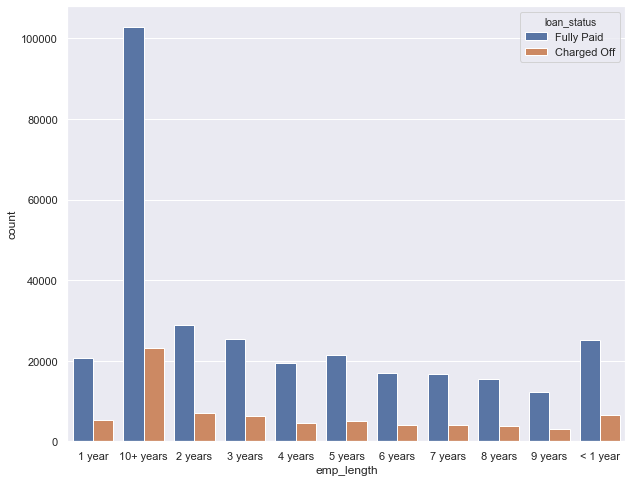

In [31]:
plt.figure(figsize=(10,8))
sns.countplot(x='emp_length',data=df,order=emporder,hue='loan_status')

In [32]:
# This doesn't really prove there is a realtionship between employ length and charged off loans
emp_co=df[df['loan_status']=='Charged Off'].groupby('emp_length').count()['loan_status']
emp_fp=df[df['loan_status']=='Fully Paid'].groupby('emp_length').count()['loan_status']

In [33]:
emp_len=emp_co/emp_fp
emp_len

emp_length
1 year       0.248649
10+ years    0.225770
2 years      0.239560
3 years      0.242593
4 years      0.238213
5 years      0.237911
6 years      0.233341
7 years      0.241887
8 years      0.249625
9 years      0.250735
< 1 year     0.260830
Name: loan_status, dtype: float64

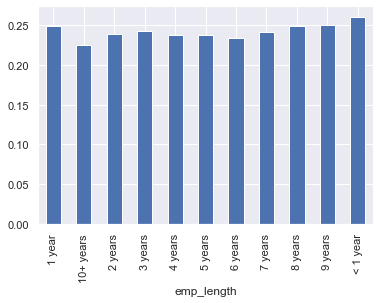

In [34]:
emp_len.plot(kind='bar')
# No realtionship

In [35]:
df=df.drop('emp_length',axis=1)

In [36]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

### Categorical Data

In [37]:
df=df.drop('title',axis=1)

In [39]:
df['mort_acc'].value_counts()

0.0     139777
1.0      60416
2.0      49948
3.0      38049
4.0      27887
5.0      18194
6.0      11069
7.0       6052
8.0       3121
9.0       1656
10.0       865
11.0       479
12.0       264
13.0       146
14.0       107
15.0        61
16.0        37
17.0        22
18.0        18
19.0        15
20.0        13
24.0        10
22.0         7
21.0         4
25.0         4
27.0         3
23.0         2
32.0         2
26.0         2
31.0         2
30.0         1
28.0         1
34.0         1
Name: mort_acc, dtype: int64

In [41]:
df['purpose'].head(10)

0              vacation
1    debt_consolidation
2           credit_card
3           credit_card
4           credit_card
5    debt_consolidation
6      home_improvement
7           credit_card
8    debt_consolidation
9    debt_consolidation
Name: purpose, dtype: object

 Purpose and title columns were same so i removed title column
#### There are many ways we could deal with this missing data. We could attempt to build a simple model to fill it in, such as a linear model, we could just fill it in based on the mean of the other columns, or you could even bin the columns into categories and then set NaN as its own category. There is no 100% correct approach! Let's review the other columsn to see which most highly correlates to mort_acc

In [43]:
print('Correlation with the mortage accounts')
df.corr()['mort_acc'].sort_values()

Correlation with the mortage accounts


int_rate               -0.082583
dti                    -0.025439
revol_util              0.007514
pub_rec                 0.011552
pub_rec_bankruptcies    0.027239
loan_repaid             0.073111
open_acc                0.109205
installment             0.193694
revol_bal               0.194925
loan_amnt               0.222315
annual_inc              0.236320
total_acc               0.381072
mort_acc                1.000000
Name: mort_acc, dtype: float64

#### Looks like the total_acc feature correlates with the mort_acc , this makes sense! Let's try this fillna() approach. We will group the dataframe by the total_acc and calculate the mean value for the mort_acc per total_acc entry. To get the result below:

In [44]:
total_acc_avg=df.groupby('total_acc').mean()['mort_acc']

In [45]:
total_acc_avg

total_acc
2.0      0.000000
3.0      0.052023
4.0      0.066743
5.0      0.103289
6.0      0.151293
           ...   
124.0    1.000000
129.0    1.000000
135.0    3.000000
150.0    2.000000
151.0    0.000000
Name: mort_acc, Length: 118, dtype: float64

In [46]:
def fill_mort_acc(total_acc,mort_acc):
    '''
    Accepts the total_acc and mort_acc values for the row.
    Checks if the mort_acc is NaN , if so, it returns the avg mort_acc value
    for the corresponding total_acc value for that row.
    
    total_acc_avg here should be a Series or dictionary containing the mapping of the
    groupby averages of mort_acc per total_acc values.
    '''
    if np.isnan(mort_acc):
        return total_acc_avg[total_acc]
    else:
        return mort_acc

In [48]:
df['mort_acc']=df.apply(lambda x: fill_mort_acc(x['total_acc'],x['mort_acc']),axis=1)

In [52]:
df.isnull().sum()

loan_amnt                 0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
loan_status               0
purpose                   0
dti                       0
earliest_cr_line          0
open_acc                  0
pub_rec                   0
revol_bal                 0
revol_util              276
total_acc                 0
initial_list_status       0
application_type          0
mort_acc                  0
pub_rec_bankruptcies    535
address                   0
loan_repaid               0
dtype: int64

In [51]:
df=df.drop('emp_title',1)

In [53]:
# Now after removing categorical data employee length insignificant data can be dropped
df=df.dropna()

# Categorical Variables and dummy variables

#### We're done working with the missing data! Now we just need to deal with the string values due to the categorical columns.

In [56]:
df.select_dtypes(['object']).columns

Index(['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'earliest_cr_line',
       'initial_list_status', 'application_type', 'address'],
      dtype='object')

In [57]:
# going through individually
feat_info('term')

The number of payments on the loan. Values are in months and can be either 36 or 60.


In [60]:
df['term']=df['term'].apply(lambda term : int(term[:3]))

In [62]:
df['term'].value_counts()

36    301247
60     93972
Name: term, dtype: int64

In [66]:
# Grade is just a part of sub grade
df=df.drop('grade',1)

In [67]:
# Dropping the original sub grade columns and ton add drop_first=True to the get_dummies cell
dummies=pd.get_dummies(df['sub_grade'],drop_first=True)

In [69]:
df=pd.concat([df.drop('sub_grade',axis=1),dummies],axis=1)

In [70]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'dti', 'earliest_cr_line', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'application_type', 'mort_acc', 'pub_rec_bankruptcies', 'address',
       'loan_repaid', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5',
       'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2',
       'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4',
       'G5'],
      dtype='object')

In [71]:
df['home_ownership'].value_counts()

MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          110
NONE            29
ANY              3
Name: home_ownership, dtype: int64

In [73]:
# By creating less categories i can convert it into dummies
df['home_ownership']=df['home_ownership'].replace(['NONE','ANY'],'OTHER')

dummy=pd.get_dummies(df['home_ownership'],drop_first=True)

In [74]:
df=df.drop('home_ownership',1)

In [76]:
df=pd.concat([df,dummies],1)

In [77]:
df['address']

0              0174 Michelle Gateway\nMendozaberg, OK 22690
1           1076 Carney Fort Apt. 347\nLoganmouth, SD 05113
2           87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113
3                     823 Reid Ford\nDelacruzside, MA 00813
4                      679 Luna Roads\nGreggshire, VA 11650
                                ...                        
396025       12951 Williams Crossing\nJohnnyville, DC 30723
396026    0114 Fowler Field Suite 028\nRachelborough, LA...
396027     953 Matthew Points Suite 414\nReedfort, NY 70466
396028    7843 Blake Freeway Apt. 229\nNew Michael, FL 2...
396029          787 Michelle Causeway\nBriannaton, AR 48052
Name: address, Length: 395219, dtype: object

In [78]:
# Only zip code would be good
df['zip_code']=df['address'].apply(lambda x:x[-5:])

In [81]:
df['zip_code'].value_counts()

70466    56880
22690    56413
30723    56402
48052    55811
00813    45725
29597    45393
05113    45300
11650    11210
93700    11126
86630    10959
Name: zip_code, dtype: int64

In [82]:
dummy3=pd.get_dummies(df['zip_code'],drop_first=True)
df=pd.concat([df.drop('zip_code',1),dummy3],1)

####  This would be data leakage, we wouldn't know beforehand whether or not a loan would be issued when using our model, so in theory we wouldn't have an issue_date, drop this feature.

In [84]:
df=df.drop('issue_d',1)

In [85]:
feat_info('earliest_cr_line')

The month the borrower's earliest reported credit line was opened


In [86]:
df['earliest_cr_line']=df['earliest_cr_line'].apply(lambda x: int(x[-4:]))

C:\Users\Heisenberg\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [92]:
df.select_dtypes(['object']).columns

Index(['loan_status'], dtype='object')

# Training and Testing 

In [93]:
from sklearn.model_selection import train_test_split as tts

In [94]:
df=df.drop('loan_status',1)
x=df.drop('loan_repaid',axis=1).values
y=df['loan_repaid'].values

# Normalizing

In [95]:
from sklearn.preprocessing import MinMaxScaler

In [96]:
scaler=MinMaxScaler()

In [99]:
x_train, x_test, y_train, y_test = tts(x, y, test_size=0.33, random_state=42)
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

## Creating the Model

In [102]:
# importing neccesary libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Activation,Dropout
from tensorflow.keras.constraints import max_norm

In [103]:
model=Sequential()

#input layer
model.add(Dense(78,activation='relu'))
model.add(Dropout(0.2))

#hidden layer
model.add(Dense(39,activation='relu'))
model.add(Dropout(0.2))

#hidden layer
model.add(Dense(19,activation='relu'))
model.add(Dropout(0.2))

#outoput
model.add(Dense(units=1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam')


In [104]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=25,
          batch_size=256,
          validation_data=(X_test, y_test), 
          )

Epoch 1/25
1035/1035 [==============================] - 4s 4ms/step - loss: 32.8153 - val_loss: 0.5171
Epoch 2/25
1035/1035 [==============================] - 4s 4ms/step - loss: 0.7488 - val_loss: 0.4952
Epoch 3/25
1035/1035 [==============================] - 4s 4ms/step - loss: 0.5901 - val_loss: 0.4939
Epoch 4/25
1035/1035 [==============================] - 4s 4ms/step - loss: 0.5439 - val_loss: 0.4939
Epoch 5/25
1035/1035 [==============================] - 4s 4ms/step - loss: 0.5415 - val_loss: 0.4939
Epoch 6/25
1035/1035 [==============================] - 4s 4ms/step - loss: 0.5085 - val_loss: 0.4939
Epoch 7/25
1035/1035 [==============================] - 4s 4ms/step - loss: 0.5003 - val_loss: 0.4939
Epoch 8/25
1035/1035 [==============================] - 4s 4ms/step - loss: 0.5051 - val_loss: 0.4939
Epoch 9/25
1035/1035 [==============================] - 4s 4ms/step - loss: 0.5055 - val_loss: 0.4939
Epoch 10/25
1035/1035 [==============================] - 4s 4ms/step - loss: 0.50

In [105]:
# Saving the model
from tensorflow.keras.models import load_model


In [106]:
model.save('Data project model.h5')

In [108]:
losses=pd.DataFrame(model.history.history)


(0, 1)

<Figure size 1008x576 with 0 Axes>

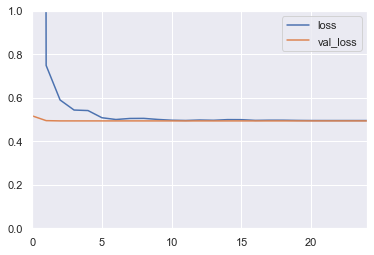

In [117]:
plt.figure(figsize=(14,8))
losses[['loss','val_loss']].plot()
plt.ylim(0,)

In [118]:
from sklearn.metrics import classification_report,confusion_matrix

In [119]:
predictions=model.predict_classes(x_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [120]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00     25480
           1       0.80      1.00      0.89    104943

    accuracy                           0.80    130423
   macro avg       0.40      0.50      0.45    130423
weighted avg       0.65      0.80      0.72    130423



C:\Users\Heisenberg\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [121]:
confusion_matrix(y_test,predictions)

array([[     0,  25480],
       [     0, 104943]], dtype=int64)

In [122]:
import random
random.seed(101)
random_ind = random.randint(0,len(df))

new_customer = df.drop('loan_repaid',axis=1).iloc[random_ind]
new_customer

loan_amnt      25000.00
term              60.00
int_rate          18.24
installment      638.11
annual_inc     61665.00
                 ...   
30723              1.00
48052              0.00
70466              0.00
86630              0.00
93700              0.00
Name: 305323, Length: 91, dtype: float64

In [124]:
model.predict_classes(new_customer.values.reshape(1,91))

array([[1]])